In [4]:
import numpy as np 
from sklearn.datasets import make_regression #génération de données aléatoires
import matplotlib.pyplot as plt #représentation des données dans des graphes

# 1.Dataset

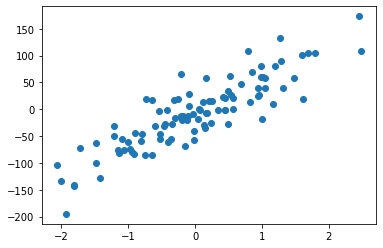

In [8]:
# génération de deux vecteurs x et y
x, y = make_regression(n_samples=100, n_features=2, noise=10) #on a plusieurs features donc X va être une matrice

# représentation graphique de y en fonction de x par rapport à une seule feature
plt.scatter(x[:,0], y)

In [9]:
# dimenseion de la matrice x
print(x.shape)

# modification de la dimension y
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 2)
(100, 1)


In [13]:
# matrice X
X = np.hstack((x, np.ones((x.shape[0], 1))))
X.shape

(100, 3)

In [16]:
# initialisation de theta avec des nombres aléatoires
theta = np.random.randn(3, 1)
theta

array([[-0.97722448],
       [-2.55552485],
       [-0.47595129]])

# 2.Modèle linéaire

In [17]:
#la fonction modèle
def modele(X, theta):
    return X.dot(theta)

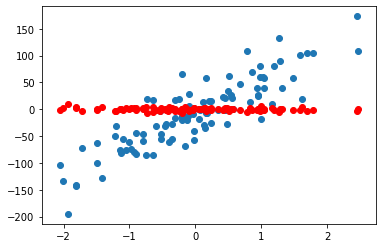

In [22]:
plt.scatter(x[:,0], y) #représenation des samples
plt.scatter(x[:,0], modele(X, theta), c='r') # représentation du modèle 

# 3.Fonction coût (erreur quadratique moyenne)

In [23]:
def cost_function(X, y, theta):
    m = len(y)
    return (1/(2*m))*np.sum((modele(X, theta)-y)**2)

In [24]:
cost_function(X, y, theta)

2161.3566948835282

# 4.Gradients et Descente de gradient

In [25]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(modele(X, theta) - y)

In [26]:
def gradient_descent(X, y, theta, learning_rate, n_iteration):
    cost_history = np.zeros(n_iteration)
    for i in range(0, n_iteration):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [27]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iteration=1000)

In [28]:
theta_final
#cost_history

array([[63.09557793],
       [29.40213561],
       [-1.20079243]])

"\nici pour être proche au modele, il faut minimiser l'erreur, et il y a deux methodes à le faire:\n-> soit on augmente le nombre d'iterations, hors que ce n'est pas très prtique \n   parce qu'on fait marcher la machine pour des heures\n-> soit on augmente le pas d'apprentissage ou le learning rate\n"

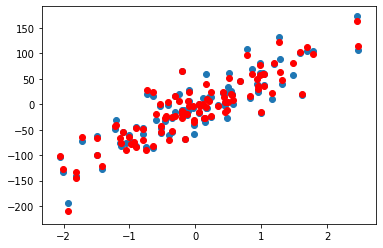

In [30]:
prediction = modele(X, theta_final)
plt.scatter(x[:,0], y) #représenation des samples
plt.scatter(x[:,0], prediction, c='r') # représentation du modèle prédit

'''
ici pour être proche au modele, il faut minimiser l'erreur, et il y a deux methodes à le faire:
-> soit on augmente le nombre d'iterations, hors que ce n'est pas très prtique 
   parce qu'on fait marcher la machine pour des heures
-> soit on augmente le pas d'apprentissage ou le learning rate
'''

# 6.Courbe d'apprentissage

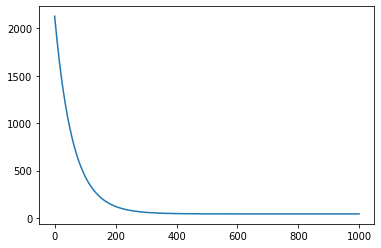

In [31]:
plt.plot(range(1000), cost_history)

# 7.Coeficient de détermination

In [32]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [33]:
coef_determination(y, prediction) # pour valuer la perfomance de modèle de regression linéaire

0.9783520169569497

<IPython.core.display.Javascript object>


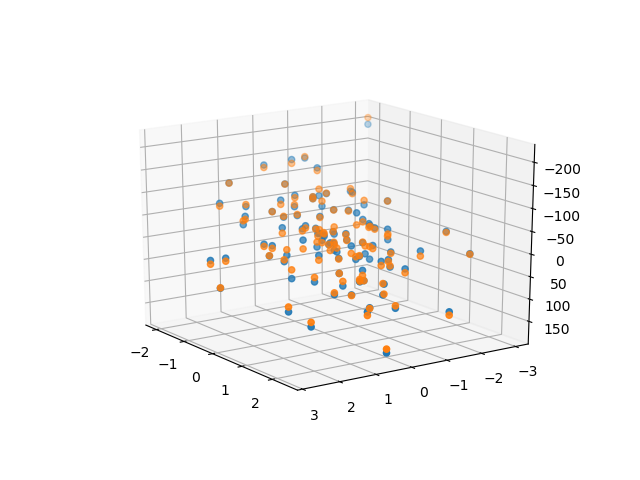

In [39]:
from mpl_toolkits import mplot3d
%matplotlib notebook
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y)
ax.scatter(x[:,0], x[:,1], prediction)